In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import sklearn.metrics as metrics
from scipy.special import expit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv("mxmh_survey_results.csv")

In [4]:
len(data)

736

In [5]:
data.head(736)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [5]:
data.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [7]:
data.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [8]:
data.duplicated().sum()

0

In [9]:
data['Music effects'].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [10]:
data.isnull()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
733,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
734,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
dummy_x = pd.get_dummies(data)
dummy_x

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Timestamp_10/11/2022 15:46:46,Timestamp_10/14/2022 18:01:12,Timestamp_10/14/2022 20:42:26,...,Frequency [Rock]_Sometimes,Frequency [Rock]_Very frequently,Frequency [Video game music]_Never,Frequency [Video game music]_Rarely,Frequency [Video game music]_Sometimes,Frequency [Video game music]_Very frequently,Music effects_Improve,Music effects_No effect,Music effects_Worsen,Permissions_I understand.
0,18.0,3.0,156.0,3.0,0.0,1.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,63.0,1.5,119.0,7.0,2.0,2.0,1.0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,120.0,7.0,6.0,0.0,9.0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
732,18.0,1.0,160.0,3.0,2.0,2.0,5.0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
733,19.0,6.0,120.0,2.0,2.0,2.0,2.0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
734,19.0,5.0,170.0,2.0,3.0,2.0,1.0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [12]:
ds1 = data.drop(['Timestamp','Permissions','BPM'], axis = 'columns')
ds1

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,Rarely,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,Sometimes,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,Very frequently,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,Rarely,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,Rarely,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,Very frequently,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


In [13]:
ds1.isnull().sum()

Age                             1
Primary streaming service       1
Hours per day                   0
While working                   3
Instrumentalist                 4
Composer                        1
Fav genre                       0
Exploratory                     0
Foreign languages               4
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects 

# LABEL ENCODING

In [14]:
le = LabelEncoder()

for column in ds1.columns:
    if pd.api.types.is_numeric_dtype(ds1[column]):
        continue
    ds1[column] = le.fit_transform(ds1[column])



In [15]:
print(ds1.shape)
ds1.head(10)

(736, 30)


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4,3.0,1,1,1,8,1,1,1,...,3,2,3,0,2,3.0,0.0,1.0,0.0,3
1,63.0,3,1.5,1,0,0,14,1,0,2,...,2,2,1,3,1,7.0,2.0,2.0,1.0,3
2,18.0,4,4.0,0,0,0,15,0,1,0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,1
3,61.0,5,2.5,1,0,1,6,1,1,2,...,2,2,0,0,0,9.0,7.0,3.0,3.0,0
4,18.0,4,4.0,1,0,0,12,1,0,0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,0
5,18.0,4,5.0,1,1,1,6,1,1,1,...,3,3,3,3,0,8.0,8.0,7.0,7.0,0
6,18.0,5,3.0,1,1,0,15,1,1,2,...,1,1,0,0,2,4.0,8.0,6.0,0.0,0
7,21.0,4,1.0,1,0,0,7,1,1,0,...,2,2,1,0,1,5.0,3.0,5.0,3.0,0
8,19.0,4,6.0,1,0,0,14,0,0,0,...,0,0,0,3,0,2.0,0.0,0.0,0.0,0
9,18.0,1,1.0,1,0,0,12,1,1,1,...,2,2,1,2,2,2.0,2.0,5.0,1.0,0


# HANDLING MISSING VALUES WITH MEAN

In [16]:
ds1['Age'] = ds1['Age'].fillna(ds1['Age'].mean())
ds1['Primary streaming service'] = ds1['Primary streaming service'].fillna(ds1['Primary streaming service'].mean())
ds1['While working'] = ds1['While working'].fillna(ds1['While working'].mean())
ds1['Instrumentalist'] = ds1['Instrumentalist'].fillna(ds1['Instrumentalist'].mean())
ds1['Composer'] = ds1['Composer'].fillna(ds1['Composer'].mean())
ds1['Foreign languages'] = ds1['Foreign languages'].fillna(ds1['Foreign languages'].mean())
ds1['Music effects'] = ds1['Music effects'].fillna(ds1['Music effects'].mean())

In [17]:
ds1.isnull().sum()

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects 

In [18]:
print(ds1.shape)
ds1.head(10)

(736, 30)


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4,3.0,1,1,1,8,1,1,1,...,3,2,3,0,2,3.0,0.0,1.0,0.0,3
1,63.0,3,1.5,1,0,0,14,1,0,2,...,2,2,1,3,1,7.0,2.0,2.0,1.0,3
2,18.0,4,4.0,0,0,0,15,0,1,0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,1
3,61.0,5,2.5,1,0,1,6,1,1,2,...,2,2,0,0,0,9.0,7.0,3.0,3.0,0
4,18.0,4,4.0,1,0,0,12,1,0,0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,0
5,18.0,4,5.0,1,1,1,6,1,1,1,...,3,3,3,3,0,8.0,8.0,7.0,7.0,0
6,18.0,5,3.0,1,1,0,15,1,1,2,...,1,1,0,0,2,4.0,8.0,6.0,0.0,0
7,21.0,4,1.0,1,0,0,7,1,1,0,...,2,2,1,0,1,5.0,3.0,5.0,3.0,0
8,19.0,4,6.0,1,0,0,14,0,0,0,...,0,0,0,3,0,2.0,0.0,0.0,0.0,0
9,18.0,1,1.0,1,0,0,12,1,1,1,...,2,2,1,2,2,2.0,2.0,5.0,1.0,0


# FEATURE SELECTION

In [19]:
#Splitting the dataset
y = ds1['Music effects']
X = ds1.drop(['Music effects'], axis = 'columns')

In [20]:
best_features = SelectKBest(k=10)
fit = best_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcols = pd.DataFrame(X.columns)

In [21]:
featureScores = pd.concat([dfcols, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

In [22]:
scalers = MinMaxScaler()

In [23]:
scalers.fit(featureScores[['Score']])

MinMaxScaler()

In [24]:
featureScores[['Score']] = scalers.transform(featureScores[['Score']])

In [25]:
X.columns[best_features.get_support()]

Index(['While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Frequency [Gospel]', 'Frequency [K pop]',
       'Frequency [R&B]', 'Anxiety', 'Depression'],
      dtype='object')

In [26]:
X = X[['While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Frequency [Gospel]', 'Frequency [K pop]',
       'Frequency [R&B]', 'Anxiety', 'Depression']]

In [27]:
X.head()

,While working,Instrumentalist,Composer,Fav genre,Exploratory,Frequency [Gospel],Frequency [K pop],Frequency [R&B],Anxiety,Depression
0,1,1,1,8,1,0,3,2,3.0,0.0
1,1,0,0,14,1,2,1,2,7.0,2.0
2,0,0,0,15,0,0,3,0,7.0,7.0
3,1,0,1,6,1,2,2,2,9.0,7.0
4,1,0,0,12,1,1,3,3,7.0,2.0


# FEATURE SCALING

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20, stratify = y)

In [29]:
print(X_train.shape)
print(X_test.shape)

(515, 10)
(221, 10)


In [30]:
X_train.columns

Index(['While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Frequency [Gospel]', 'Frequency [K pop]',
       'Frequency [R&B]', 'Anxiety', 'Depression'],
      dtype='object')

In [31]:
cols_scale = ['While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Frequency [Gospel]', 'Frequency [K pop]',
       'Frequency [R&B]', 'Anxiety', 'Depression']

In [32]:
len(cols_scale)

10

In [33]:
scaler = MinMaxScaler()

In [34]:
scaler.fit(X_train[cols_scale])

MinMaxScaler()

In [35]:
X_train[cols_scale] = scaler.transform(X_train[cols_scale])
X_test[cols_scale] = scaler.transform(X_test[cols_scale])

In [36]:
X_train.head()

,While working,Instrumentalist,Composer,Fav genre,Exploratory,Frequency [Gospel],Frequency [K pop],Frequency [R&B],Anxiety,Depression
253,0.5,0.0,0.0,0.333333,1.0,0.000000,0.0,0.666667,0.6,0.6
602,0.0,0.0,0.0,0.733333,0.0,0.333333,0.0,0.666667,0.5,0.6
154,0.0,0.0,0.0,0.933333,0.0,0.000000,0.0,0.333333,1.0,0.7
581,0.0,0.0,0.0,0.933333,0.0,0.000000,1.0,1.000000,0.8,1.0
679,0.5,0.0,0.0,0.066667,0.0,0.000000,1.0,0.666667,0.1,0.0


In [37]:
X_test.head()

,While working,Instrumentalist,Composer,Fav genre,Exploratory,Frequency [Gospel],Frequency [K pop],Frequency [R&B],Anxiety,Depression
680,0.0,0.0,0.0,0.800000,1.0,0.666667,1.000000,1.000000,0.8,0.7
279,0.5,0.0,0.0,0.666667,1.0,0.333333,0.000000,0.333333,0.8,0.8
468,0.5,0.0,0.0,0.200000,1.0,0.000000,0.000000,0.666667,0.8,0.7
6,0.5,0.5,0.0,1.000000,1.0,0.333333,0.000000,0.333333,0.4,0.8
59,0.5,0.5,0.0,1.000000,0.0,0.000000,0.333333,1.000000,0.7,0.0


# LOGISTIC REGRESSION CLASSIFIER

C:\Users\raiha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Train Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       433
           1       0.55      0.09      0.15       135
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         6

    accuracy                           0.74       588
   macro avg       0.32      0.27      0.25       588
weighted avg       0.68      0.74      0.66       588

Train Accuracy: 0.7431972789115646
Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       109
           1       0.50      0.12      0.19        34
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.74       148
   macro avg       0.31      0.27      0.26       148
weighted avg       0.67      0.74      0.66       148

Test Accuracy: 0.7364864864864865


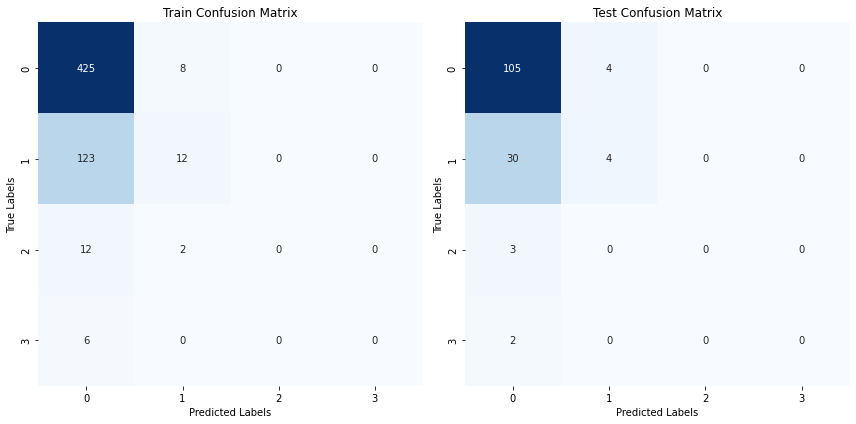

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Initialize the Logistic Regression Classifier
logistic_regression = LogisticRegression()

# Step 3: Train the classifier
logistic_regression.fit(X_train, y_train)

# Step 4: Make predictions on the training set
y_train_pred = logistic_regression.predict(X_train)

# Step 5: Make predictions on the test set
y_test_pred = logistic_regression.predict(X_test)

# Step 6: Evaluate the model
classification_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

classification_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Train Classification Report:")
print(classification_train)
print("Train Accuracy:", accuracy_train)

print("Test Classification Report:")
print(classification_test)
print("Test Accuracy:", accuracy_test)

# Step 7: Generate and display the confusion matrix
labels = np.unique(y)
cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[0])
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[1])
ax[0].set_title("Train Confusion Matrix")
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")
ax[1].set_title("Test Confusion Matrix")
ax[1].set_xlabel("Predicted Labels")
ax[1].set_ylabel("True Labels")
plt.tight_layout()
plt.show()

# DECISION TREE

In [39]:
dt = DecisionTreeClassifier()

In [40]:
#Random Search
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 1000,50)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [41]:
# Randomized search on hyper parameters
dt_randomcv=RandomizedSearchCV(estimator=dt,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
# Controls the verbosity: the higher, the more messages
# Number of jobs to run in parallel
### fit the randomized model
dt_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [20, 40, 60, 80, 100, 120,
                                                      140, 160, 180, 200, 220,
                                                      240, 260, 280, 300, 320,
                                                      340, 360, 380, 400, 420,
                                                      440, 460, 480, 500, 520,
                                                      540, 560, 580, 600, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [42]:
dt_randomcv.best_params_
# Parameter setting that gave the best results

{'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 520,
 'criterion': 'entropy'}

In [43]:
dt_randomcv

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [20, 40, 60, 80, 100, 120,
                                                      140, 160, 180, 200, 220,
                                                      240, 260, 280, 300, 320,
                                                      340, 360, 380, 400, 420,
                                                      440, 460, 480, 500, 520,
                                                      540, 560, 580, 600, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [44]:
dt =  DecisionTreeClassifier(min_samples_split = 2,
 min_samples_leaf = 8,
 max_features = 'sqrt',
 max_depth = 980,
 criterion = 'gini')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       109
           1       0.47      0.21      0.29        34
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.74       148
   macro avg       0.31      0.29      0.28       148
weighted avg       0.67      0.74      0.69       148

Train Accuracy:  0.7568027210884354
Test Accuracy:  0.7364864864864865


C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title, fontsize= 20)
    plt.ylabel('Actual label', fontsize= 20)
    plt.xlabel('Predicted label', fontsize= 20)

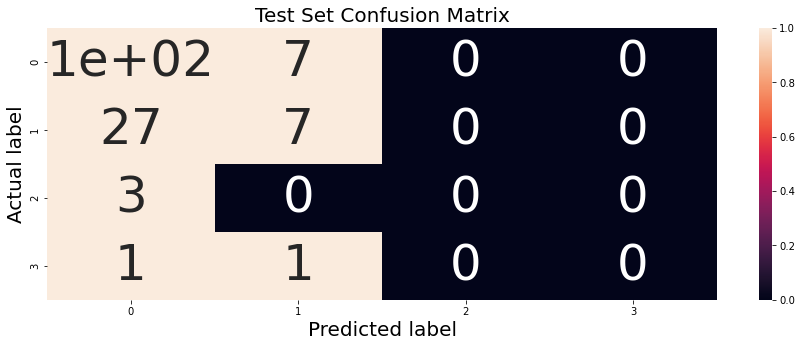

In [46]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,5))
plot_confusion_matrix(cm, classes=dt.classes_, title='Test Set Confusion Matrix')

# SVM CLASSIFIER

In [47]:
clf = svm.SVC() 

In [48]:
# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.735 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.735 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['linear']},
             verbose=3)

In [49]:
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


In [50]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))
print("Train Accuracy: ", accuracy_score(y_train, grid.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       109
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.74       148
   macro avg       0.18      0.25      0.21       148
weighted avg       0.54      0.74      0.62       148

Train Accuracy:  0.7363945578231292
Test Accuracy:  0.7364864864864865


C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ADABOOST CLASSIFIER

C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       429
           1       0.52      0.10      0.16       135
           2       0.05      0.31      0.09        16
           3       0.00      0.00      0.00         8

    accuracy                           0.59       588
   macro avg       0.33      0.30      0.25       588
weighted avg       0.67      0.59      0.59       588

Train Accuracy: 0.5935374149659864
Test Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       113
           1       0.71      0.15      0.24        34
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.62       148
   macro avg       0.37      0.23      0.26       148
weighted avg       0.76      0.62      0.65       148

Test Accuracy: 0.6216216216216216


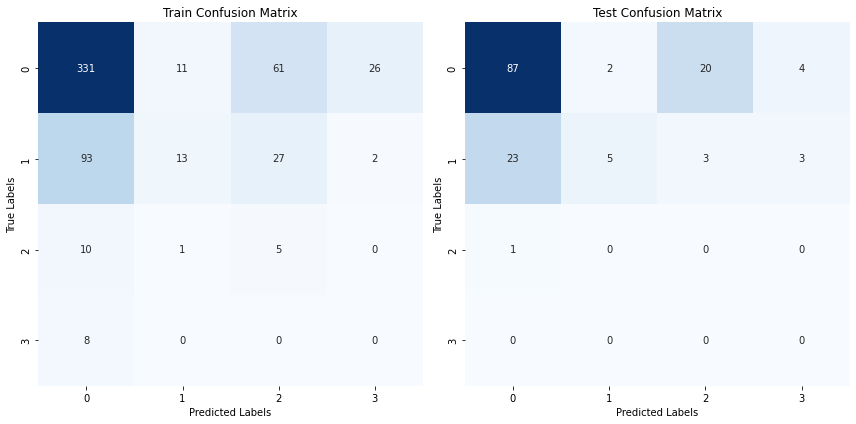

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the AdaBoostClassifier
adaboost = AdaBoostClassifier()

# Step 3: Train the classifier
adaboost.fit(X_train, y_train)

# Step 4: Make predictions on the training set
y_train_pred = adaboost.predict(X_train)

# Step 5: Make predictions on the test set
y_test_pred = adaboost.predict(X_test)

# Step 6: Evaluate the model
classification_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

classification_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Train Classification Report:")
print(classification_train)
print("Train Accuracy:", accuracy_train)

print("Test Classification Report:")
print(classification_test)
print("Test Accuracy:", accuracy_test)

# Step 7: Generate and display the confusion matrix
labels = np.unique(y)
cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[0])
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[1])
ax[0].set_title("Train Confusion Matrix")
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")
ax[1].set_title("Test Confusion Matrix")
ax[1].set_xlabel("Predicted Labels")
ax[1].set_ylabel("True Labels")
plt.tight_layout()
plt.show()

# KNN Classifier

C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metr

Train Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       429
           1       0.63      0.27      0.38       135
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         8

    accuracy                           0.76       588
   macro avg       0.35      0.31      0.31       588
weighted avg       0.71      0.76      0.71       588

Train Accuracy: 0.7602040816326531
Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       113
           1       0.15      0.06      0.09        34
           2       0.00      0.00      0.00         1

    accuracy                           0.70       148
   macro avg       0.30      0.32      0.30       148
weighted avg       0.61      0.70      0.65       148

Test Accuracy: 0.7027027027027027


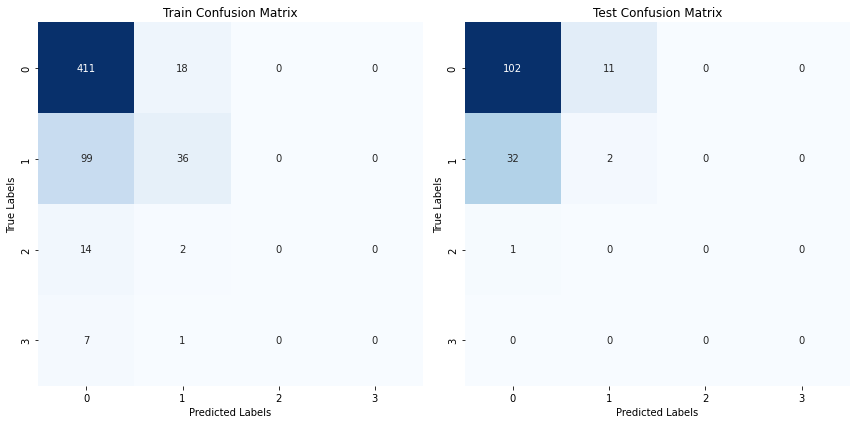

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the KNN Classifier
knn = KNeighborsClassifier()

# Step 3: Train the classifier
knn.fit(X_train, y_train)

# Step 4: Make predictions on the training set
y_train_pred = knn.predict(X_train)

# Step 5: Make predictions on the test set
y_test_pred = knn.predict(X_test)

# Step 6: Evaluate the model
classification_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

classification_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Train Classification Report:")
print(classification_train)
print("Train Accuracy:", accuracy_train)

print("Test Classification Report:")
print(classification_test)
print("Test Accuracy:", accuracy_test)

# Step 7: Generate and display the confusion matrix
labels = np.unique(y)
cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[0])
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[1])
ax[0].set_title("Train Confusion Matrix")
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")
ax[1].set_title("Test Confusion Matrix")
ax[1].set_xlabel("Predicted Labels")
ax[1].set_ylabel("True Labels")
plt.tight_layout()
plt.show()

# RANDOM FOREST

C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiha\anaconda3\lib\site-packages\sklearn\metr

Train Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       429
           1       0.92      0.24      0.39       135
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         8

    accuracy                           0.78       588
   macro avg       0.42      0.31      0.31       588
weighted avg       0.78      0.78      0.73       588

Train Accuracy: 0.7840136054421769
Test Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       113
           1       1.00      0.03      0.06        34
           2       0.00      0.00      0.00         1

    accuracy                           0.77       148
   macro avg       0.59      0.34      0.31       148
weighted avg       0.82      0.77      0.68       148

Test Accuracy: 0.7702702702702703


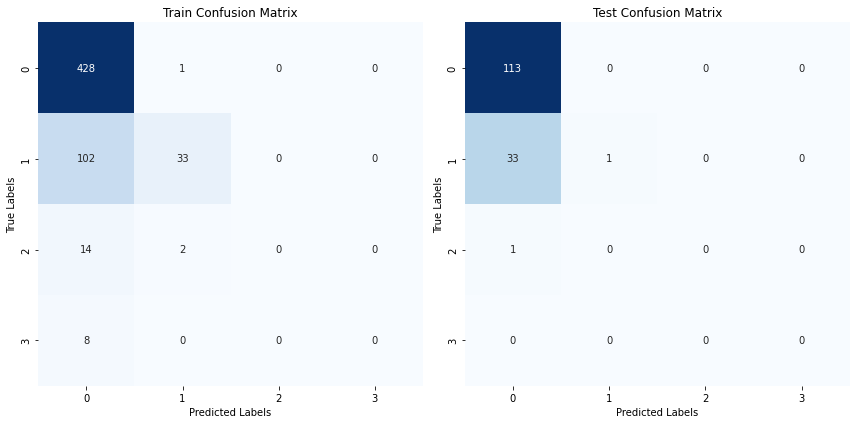

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 3: Initialize the Random Forest Classifier
random_forest = RandomForestClassifier()

# Step 4: Perform RandomizedSearchCV
random_search = RandomizedSearchCV(random_forest, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Step 5: Get the best model and its predictions
best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Step 6: Evaluate the model
classification_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

classification_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Train Classification Report:")
print(classification_train)
print("Train Accuracy:", accuracy_train)

print("Test Classification Report:")
print(classification_test)
print("Test Accuracy:", accuracy_test)

# Step 7: Generate and display the confusion matrix
labels = np.unique(y)
cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[0])
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[1])
ax[0].set_title("Train Confusion Matrix")
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")
ax[1].set_title("Test Confusion Matrix")
ax[1].set_xlabel("Predicted Labels")
ax[1].set_ylabel("True Labels")
plt.tight_layout()
plt.show()